## peter ramzy riyad
## beterramzy667@gmail.com
## Natural-Scenes-Classification-
## Overview
DL models to classify Natural-Scenes images and compare models
## About Dataset
images of Natural Scenes around the world.

This Data contains around 24k images of size 150x150 distributed under 6 categories: Buildings, Forest, Glacier, Mountain, Sea, Street. 

The Train, Test and Prediction data is separated in each zip file. There are around 14k images in Train, 3k in Test and 7k in Prediction. 

Train Folder to train model 

Test Folder to evaluate model 

Prediction Folder to make predictions on new, unseen data.

## Steps

### 1- Data preprocessing 
  preprocess data to make images suitable to use in models, preprocessing like resizing and normalizing images 

### 2- AlexNet model implementaion and evalute it on test data

### 3- using transefer learning on VGG model 

### 4- using transefer learning on Resnet model

### 5- using transefer learning on inception model 
 
### 6- comparing between models




In [72]:
import numpy as np
import cv2
import os
from glob import glob
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# load dataset

In [73]:
#main path
main_folder_path = '/kaggle/input/intel-image-classification'
#  image size
target_size = (227, 227)

In [74]:
# paths
train_path = '/kaggle/input/intel-image-classification/seg_train/seg_train'  
test_path = '/kaggle/input/intel-image-classification/seg_test/seg_test'    
predict_path = '/kaggle/input/intel-image-classification/seg_pred/seg_pred'  


# preprocess data

In [75]:
# Function to load and preprocess images and make a label for each image
def load_and_preprocess_data(main_path, dataset_type, target_size=target_size):
    images = []
    labels = []
    label_dict = {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}

    dataset_path = os.path.join(main_path, dataset_type)

    for category in label_dict.keys():
        category_path = os.path.join(dataset_path, category)
        for file in glob(os.path.join(category_path, '*.jpg')):
            image = cv2.imread(file)
            image = cv2.resize(image, target_size)
            images.append(image)
            labels.append(label_dict[category])

    return np.array(images), np.array(labels)

In [76]:
# Load and preprocess training data
train_images, train_labels = load_and_preprocess_data(main_folder_path, '/kaggle/input/intel-image-classification/seg_train/seg_train')

# Load and preprocess test data
test_images, test_labels = load_and_preprocess_data(main_folder_path, '/kaggle/input/intel-image-classification/seg_test/seg_test')


# Split training data into training and validation sets

In [77]:

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# preprocess images

In [78]:
# Preprocess images for the model
def preprocess_images(images, labels=None, target_size=target_size, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))

    def preprocess_image(image, label):
        image = tf.image.resize(image, target_size)
        image = image / 255.0  # Normalize pixel values to the range [0, 1]
        return image, label

    dataset = dataset.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    dataset = dataset.batch(batch_size)
    return dataset


# alexnet model

In [79]:
def create_improved_alexnet(input_shape=(227, 227, 3), num_classes=6):
    model = models.Sequential()
    
    # Layer 1
    model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(BatchNormalization())

    # Layer 2
    model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(BatchNormalization())

    # Layer 3
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())

    # Layer 4
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())

    # Layer 5
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(BatchNormalization())

    # Flatten
    model.add(Flatten())

    # Fully connected layers with increased dropout
    model.add(Dense(4096, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.7))  # Increased dropout rate
    model.add(Dense(4096, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.7))  # Increased dropout rate

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [80]:
# Preprocess datasets
batch_size = 32
train_dataset = preprocess_images(train_images, train_labels, batch_size=batch_size)
val_dataset = preprocess_images(val_images, val_labels, batch_size=batch_size)
test_dataset = preprocess_images(test_images, test_labels, batch_size=batch_size)

In [101]:
##### #Create the improved AlexNet model
improved_alexnet_model = create_improved_alexnet()

# Compile the model
improved_alexnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
epoc= 50
improved_history = improved_alexnet_model.fit(train_dataset, epochs=epoc, batch_size=batch_size,
                          validation_data=val_dataset)

# Evaluate the model on the test set
test_loss, test_acc = improved_alexnet_model.evaluate(test_dataset)
print(f'Test accuracy with improved AlexNet: {test_acc}')



Epoch 1/50
351/351 [==============================] - 10s 17ms/step - loss: 4.3393 - accuracy: 0.4447 - val_loss: 1.2503 - val_accuracy: 0.5069
Epoch 2/50
351/351 [==============================] - 6s 16ms/step - loss: 1.3167 - accuracy: 0.5503 - val_loss: 1.2587 - val_accuracy: 0.5237
Epoch 3/50
351/351 [==============================] - 5s 15ms/step - loss: 1.1502 - accuracy: 0.5973 - val_loss: 1.7591 - val_accuracy: 0.4763
Epoch 4/50
351/351 [==============================] - 5s 15ms/step - loss: 1.1419 - accuracy: 0.6138 - val_loss: 1.8713 - val_accuracy: 0.4054
Epoch 5/50
351/351 [==============================] - 6s 16ms/step - loss: 1.1071 - accuracy: 0.6297 - val_loss: 1.0891 - val_accuracy: 0.6056
Epoch 6/50
351/351 [==============================] - 6s 16ms/step - loss: 1.1002 - accuracy: 0.6406 - val_loss: 1.2372 - val_accuracy: 0.6152
Epoch 7/50
351/351 [==============================] - 5s 16ms/step - loss: 1.1130 - accuracy: 0.6483 - val_loss: 1.5134 - val_accuracy: 0.480

In [102]:
# Evaluate the model on the test set
test_loss, test_acc = improved_alexnet_model.evaluate(test_dataset)

print(f'Test accuracy: {test_acc}')

94/94 [==============================] - 1s 6ms/step - loss: 0.6195 - accuracy: 0.8070
Test accuracy: 0.8069999814033508


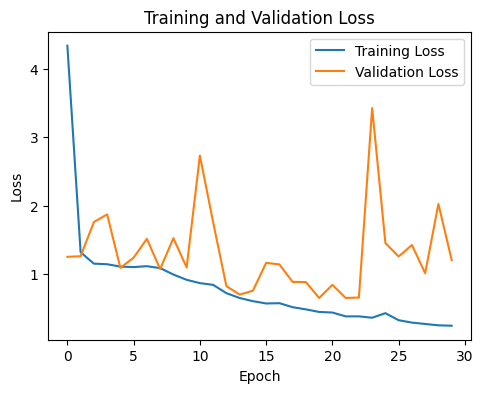

In [103]:
# Plot the training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(improved_history.history['loss'], label='Training Loss')
plt.plot(improved_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

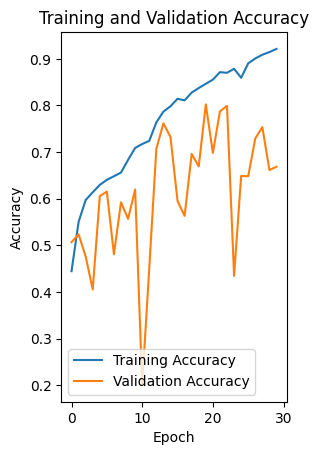

In [104]:
# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(improved_history.history['accuracy'], label='Training Accuracy')
plt.plot(improved_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# function  that predicts labels using the model
def predict_labels(model, images):
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    return predicted_labels

In [106]:
def load_and_preprocess_data2(images_path):
    # Load and preprocess the prediction data
    predict_images = []  # Load prediction images using cv2 or any other library
    
    for file in glob(os.path.join(images_path, '*.jpg')):
        image = cv2.imread(file)
        
        # Preprocess the image (resize and normalize)
        if image is not None and image.shape[:2] != (0, 0):
            resized_img = cv2.resize(image, target_size)
            normalized_img = resized_img / 255.0
            predict_images.append(normalized_img)

    return np.array(predict_images)

In [107]:
# Load and preprocess prediction data
normalized_predict_images = load_and_preprocess_data2(predict_path)


229/229 [==============================] - 2s 7ms/step


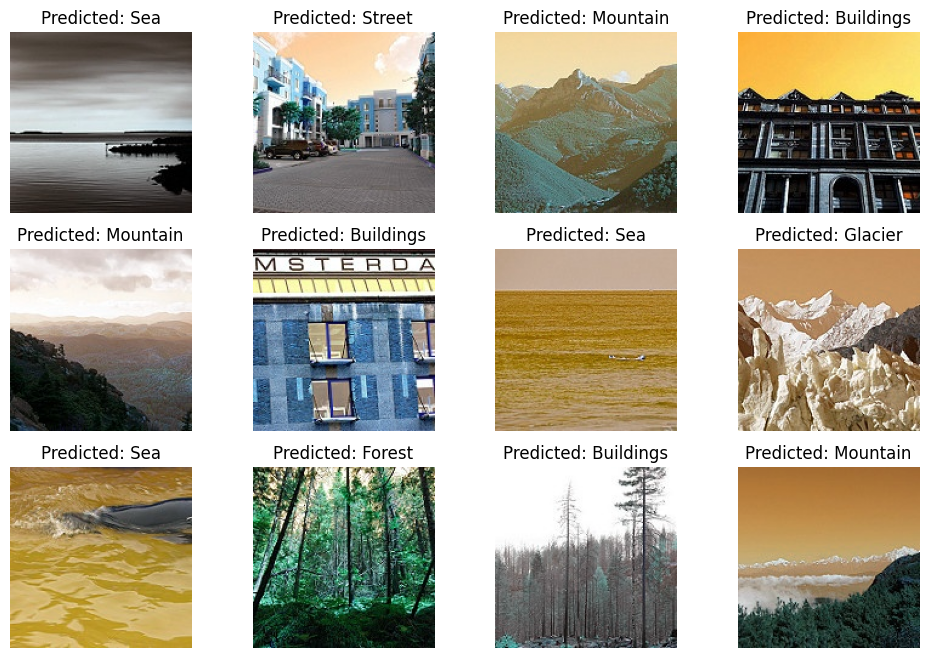

In [108]:
# Define a dictionary mapping numerical labels to text labels
label_dict = {0: 'Buildings', 1: 'Forest', 2: 'Glacier', 3: 'Mountain', 4: 'Sea', 5: 'Street'}

# Predict labels using the trained AlexNet model
predicted_labels = predict_labels(improved_alexnet_model, normalized_predict_images)

# Convert numerical labels to text labels
predicted_labels_text = [label_dict[label] for label in predicted_labels]

# Display at least 12 images with their corresponding predictions
num_images_to_display = 12
selected_images = normalized_predict_images[:num_images_to_display]
selected_labels = predicted_labels_text[:num_images_to_display]

plt.figure(figsize=(12, 8))
for i in range(num_images_to_display):
    plt.subplot(3, 4, i + 1)
    plt.imshow(selected_images[i])
    plt.title(f'Predicted: {selected_labels[i]}')
    plt.axis('off')

plt.show()

In [109]:
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.optimizers import Adam

# vgg model

In [110]:
# Function to create and compile VGG model
def create_vgg_model(input_shape=(227, 227, 3), num_classes=6):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [111]:
# Train VGG model
vgg_model = create_vgg_model()
epochs=50
vgg_history = vgg_model.fit(train_dataset, epochs=epochs, batch_size=batch_size,
                            validation_data=val_dataset)


Epoch 1/50
351/351 [==============================] - 17s 44ms/step - loss: 0.5613 - accuracy: 0.7994 - val_loss: 0.3714 - val_accuracy: 0.8682
Epoch 2/50
351/351 [==============================] - 15s 43ms/step - loss: 0.3781 - accuracy: 0.8638 - val_loss: 0.3476 - val_accuracy: 0.8714
Epoch 3/50
351/351 [==============================] - 15s 43ms/step - loss: 0.3163 - accuracy: 0.8830 - val_loss: 0.3498 - val_accuracy: 0.8764
Epoch 4/50
351/351 [==============================] - 15s 43ms/step - loss: 0.2797 - accuracy: 0.9004 - val_loss: 0.3706 - val_accuracy: 0.8774
Epoch 5/50
351/351 [==============================] - 15s 43ms/step - loss: 0.2392 - accuracy: 0.9151 - val_loss: 0.3956 - val_accuracy: 0.8771
Epoch 6/50
351/351 [==============================] - 15s 43ms/step - loss: 0.2253 - accuracy: 0.9154 - val_loss: 0.4023 - val_accuracy: 0.8750
Epoch 7/50
351/351 [==============================] - 15s 43ms/step - loss: 0.2044 - accuracy: 0.9254 - val_loss: 0.4094 - val_accuracy:

In [112]:
# Evaluate VGG model on test set
test_loss_vgg, test_acc_vgg = vgg_model.evaluate(test_dataset)
print(f'Test accuracy for VGG: {test_acc_vgg}')

94/94 [==============================] - 3s 34ms/step - loss: 0.8553 - accuracy: 0.8750
Test accuracy for VGG: 0.875


229/229 [==============================] - 8s 34ms/step


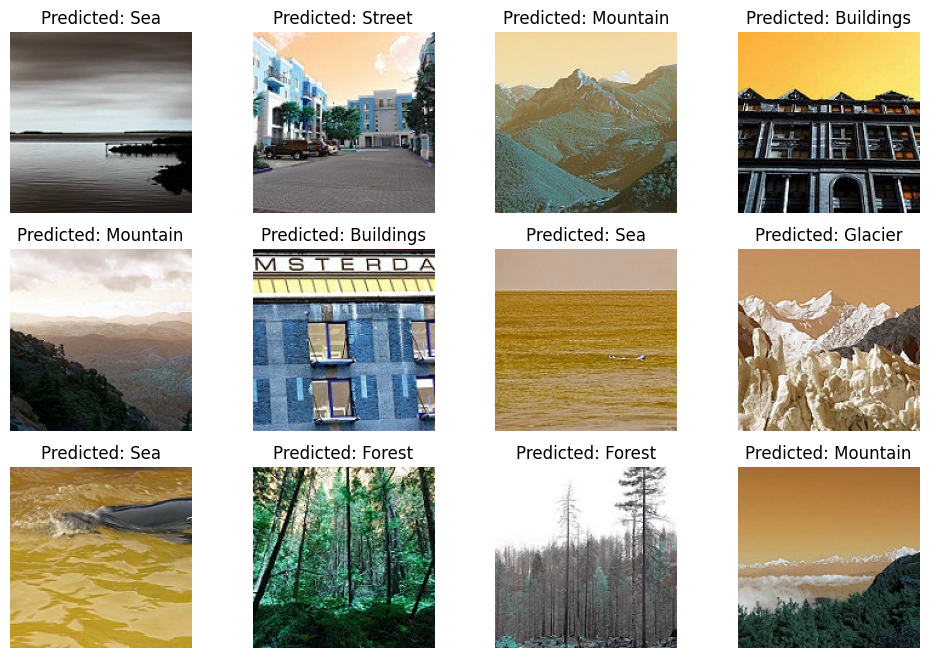

In [115]:
# Define a dictionary mapping numerical labels to text labels
label_dict = {0: 'Buildings', 1: 'Forest', 2: 'Glacier', 3: 'Mountain', 4: 'Sea', 5: 'Street'}

# Predict labels using the trained AlexNet model
predicted_labels = predict_labels(vgg_model, normalized_predict_images)

# Convert numerical labels to text labels
predicted_labels_text = [label_dict[label] for label in predicted_labels]

# Display at least 12 images with their corresponding predictions
num_images_to_display = 12
selected_images = normalized_predict_images[:num_images_to_display]
selected_labels = predicted_labels_text[:num_images_to_display]

plt.figure(figsize=(12, 8))
for i in range(num_images_to_display):
    plt.subplot(3, 4, i + 1)
    plt.imshow(selected_images[i])
    plt.title(f'Predicted: {selected_labels[i]}')
    plt.axis('off')

plt.show()

# resnet model

In [116]:
# Function to create and compile ResNet model
def create_resnet_model(input_shape=(227, 227, 3), num_classes=6):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [118]:
# Train ResNet model
resnet_model = create_resnet_model()
resnet_history = resnet_model.fit(train_dataset, epochs=epochs, batch_size=batch_size,
                                  validation_data=val_dataset)

Epoch 1/50
351/351 [==============================] - 18s 42ms/step - loss: 1.6464 - accuracy: 0.3408 - val_loss: 1.5477 - val_accuracy: 0.4275
Epoch 2/50
351/351 [==============================] - 14s 39ms/step - loss: 1.4772 - accuracy: 0.4555 - val_loss: 1.4328 - val_accuracy: 0.4809
Epoch 3/50
351/351 [==============================] - 14s 39ms/step - loss: 1.3804 - accuracy: 0.5000 - val_loss: 1.3552 - val_accuracy: 0.5183
Epoch 4/50
351/351 [==============================] - 14s 40ms/step - loss: 1.3126 - accuracy: 0.5261 - val_loss: 1.2981 - val_accuracy: 0.5404
Epoch 5/50
351/351 [==============================] - 14s 39ms/step - loss: 1.2616 - accuracy: 0.5435 - val_loss: 1.2541 - val_accuracy: 0.5550
Epoch 6/50
351/351 [==============================] - 14s 40ms/step - loss: 1.2213 - accuracy: 0.5603 - val_loss: 1.2191 - val_accuracy: 0.5657
Epoch 7/50
351/351 [==============================] - 14s 39ms/step - loss: 1.1886 - accuracy: 0.5709 - val_loss: 1.1903 - val_accuracy:

In [119]:
# Evaluate ResNet model on test set
test_loss_resnet, test_acc_resnet = resnet_model.evaluate(test_dataset)
print(f'Test accuracy for ResNet: {test_acc_resnet}')

94/94 [==============================] - 3s 32ms/step - loss: 0.8971 - accuracy: 0.6633
Test accuracy for ResNet: 0.6633333563804626


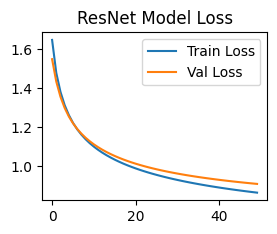

In [120]:
# ResNet model
plt.subplot(2, 2, 3)
plt.plot(resnet_history.history['loss'], label='Train Loss')
plt.plot(resnet_history.history['val_loss'], label='Val Loss')
plt.title('ResNet Model Loss')
plt.legend()




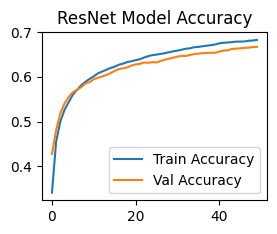

In [121]:
plt.subplot(2, 2, 4)
plt.plot(resnet_history.history['accuracy'], label='Train Accuracy')
plt.plot(resnet_history.history['val_accuracy'], label='Val Accuracy')
plt.title('ResNet Model Accuracy')
plt.legend()

229/229 [==============================] - 8s 31ms/step


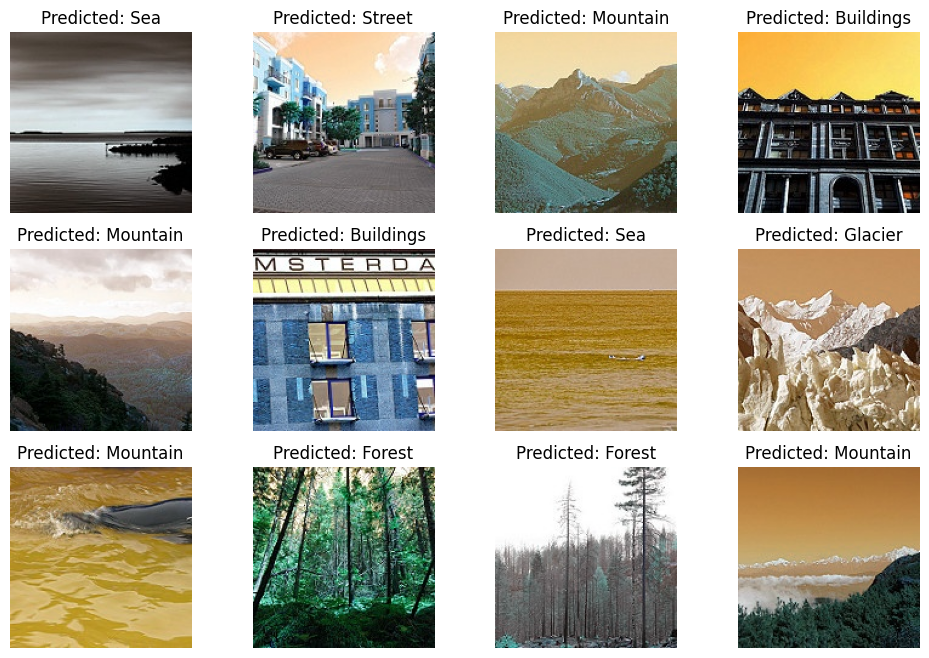

In [122]:
# Define a dictionary mapping numerical labels to text labels
label_dict = {0: 'Buildings', 1: 'Forest', 2: 'Glacier', 3: 'Mountain', 4: 'Sea', 5: 'Street'}

# Predict labels using the trained AlexNet model
predicted_labels = predict_labels(resnet_model, normalized_predict_images)

# Convert numerical labels to text labels
predicted_labels_text = [label_dict[label] for label in predicted_labels]

# Display at least 12 images with their corresponding predictions
num_images_to_display = 12
selected_images = normalized_predict_images[:num_images_to_display]
selected_labels = predicted_labels_text[:num_images_to_display]

plt.figure(figsize=(12, 8))
for i in range(num_images_to_display):
    plt.subplot(3, 4, i + 1)
    plt.imshow(selected_images[i])
    plt.title(f'Predicted: {selected_labels[i]}')
    plt.axis('off')

plt.show()

# Inception model

In [123]:
# Function to create and compile Inception model
def create_inception_model(input_shape=(227, 227 3), num_classes=6):
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [124]:
# Train Inception model
inception_model = create_inception_model()
inception_history = inception_model.fit(train_dataset, epochs=epochs, batch_size=batch_size,
                                        validation_data=val_dataset)

Epoch 1/50
351/351 [==============================] - 18s 40ms/step - loss: 0.5369 - accuracy: 0.8126 - val_loss: 0.4764 - val_accuracy: 0.8507
Epoch 2/50
351/351 [==============================] - 11s 33ms/step - loss: 0.3668 - accuracy: 0.8716 - val_loss: 0.4250 - val_accuracy: 0.8614
Epoch 3/50
351/351 [==============================] - 11s 32ms/step - loss: 0.3148 - accuracy: 0.8895 - val_loss: 0.4024 - val_accuracy: 0.8643
Epoch 4/50
351/351 [==============================] - 11s 32ms/step - loss: 0.2835 - accuracy: 0.9012 - val_loss: 0.3916 - val_accuracy: 0.8632
Epoch 5/50
351/351 [==============================] - 11s 32ms/step - loss: 0.2603 - accuracy: 0.9095 - val_loss: 0.3900 - val_accuracy: 0.8685
Epoch 6/50
351/351 [==============================] - 11s 31ms/step - loss: 0.2413 - accuracy: 0.9158 - val_loss: 0.3925 - val_accuracy: 0.8721
Epoch 7/50
351/351 [==============================] - 11s 32ms/step - loss: 0.2259 - accuracy: 0.9215 - val_loss: 0.3993 - val_accuracy:

In [125]:
# Evaluate Inception model on test set
test_loss_inception, test_acc_inception = inception_model.evaluate(test_dataset)
print(f'Test accuracy for Inception: {test_acc_inception}')

94/94 [==============================] - 3s 34ms/step - loss: 0.8337 - accuracy: 0.8550
Test accuracy for Inception: 0.8550000190734863


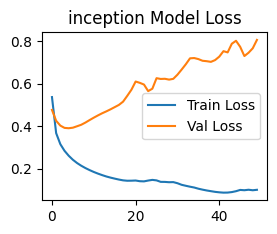

In [126]:
# ResNet model
plt.subplot(2, 2, 3)
plt.plot(inception_history.history['loss'], label='Train Loss')
plt.plot(inception_history.history['val_loss'], label='Val Loss')
plt.title('inception Model Loss')
plt.legend()



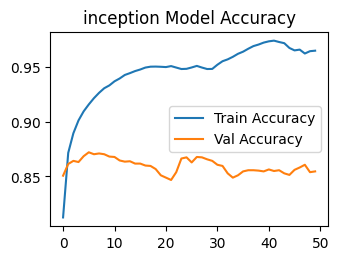

In [127]:
plt.subplot(2, 2, 4)
plt.plot(inception_history.history['accuracy'], label='Train Accuracy')
plt.plot(inception_history.history['val_accuracy'], label='Val Accuracy')
plt.title('inception Model Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

229/229 [==============================] - 7s 26ms/step


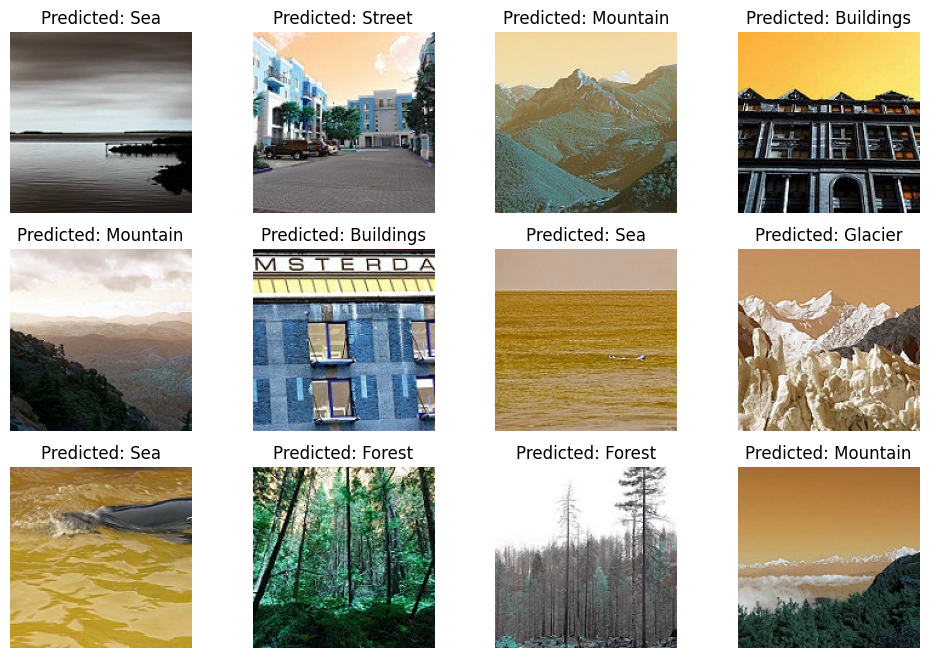

In [128]:
# Define a dictionary mapping numerical labels to text labels
label_dict = {0: 'Buildings', 1: 'Forest', 2: 'Glacier', 3: 'Mountain', 4: 'Sea', 5: 'Street'}

# Predict labels using the trained inception_model
predicted_labels = predict_labels(inception_model, normalized_predict_images)

# Convert numerical labels to text labels
predicted_labels_text = [label_dict[label] for label in predicted_labels]

# Display at least 12 images with their corresponding predictions
num_images_to_display = 12
selected_images = normalized_predict_images[:num_images_to_display]
selected_labels = predicted_labels_text[:num_images_to_display]

plt.figure(figsize=(12, 8))
for i in range(num_images_to_display):
    plt.subplot(3, 4, i + 1)
    plt.imshow(selected_images[i])
    plt.title(f'Predicted: {selected_labels[i]}')
    plt.axis('off')

plt.show()

In [129]:
# Save the best weights for each model
vgg_model.save_weights('vgg_best_weights.h5')
resnet_model.save_weights('resnet_best_weights.h5')
inception_model.save_weights('inception_best_weights.h5')


In [130]:
# Compare and write which model is the best based on test accuracy
best_model = max([(test_acc,'alexnet'),(test_acc_vgg, 'VGG'), (test_acc_resnet, 'ResNet'), (test_acc_inception, 'Inception')])
print(f'The best model is {best_model[1]} with test accuracy: {best_model[0]}')

The best model is VGG with test accuracy: 0.875
